In [1]:
### Create Heatmap Type visualization of college hockey score bingo data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data using os join
data = pd.read_csv(os.path.join('..', 'TEMP', 'season_table_test.csv'))

# Filter out exhibition games
filtered_data = data[data['Conference'] != 'Exhibition']

# Determine the maximum scores for both home and away teams to set up the axes
max_home_score = filtered_data['Home_Score'].max()
max_away_score = filtered_data['Away_Score'].max()

# Create a pivot table to aggregate game counts for each score combination
score_combinations = pd.pivot_table(filtered_data, index='Home_Score', columns='Away_Score', values='Date', aggfunc='count', fill_value=0)

# Fill in any missing score combinations with zeros (in case some scores don't appear in the dataset)
all_scores = np.arange(0, max(max_home_score, max_away_score) + 1)  # +1 to include the max score itself
score_combinations = score_combinations.reindex(index=all_scores, columns=all_scores, fill_value=0)
# score_combinations

# data.head()

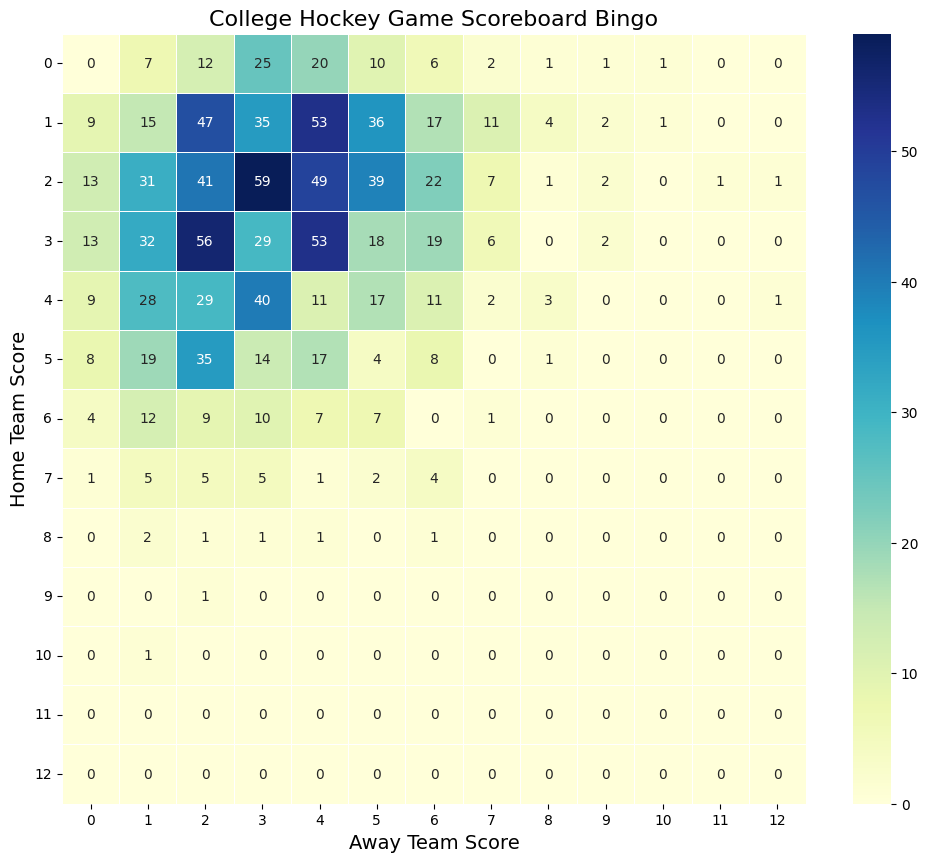

In [3]:



# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(score_combinations, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title('College Hockey Game Scoreboard Bingo', fontsize=16)
plt.xlabel('Away Team Score', fontsize=14)
plt.ylabel('Home Team Score', fontsize=14)
plt.xticks(np.arange(0.5, len(all_scores)+0.5, 1), all_scores)
plt.yticks(np.arange(0.5, len(all_scores)+0.5, 1), all_scores, rotation=0)
plt.show()


In [4]:
filtered_data.shape

(1147, 15)

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

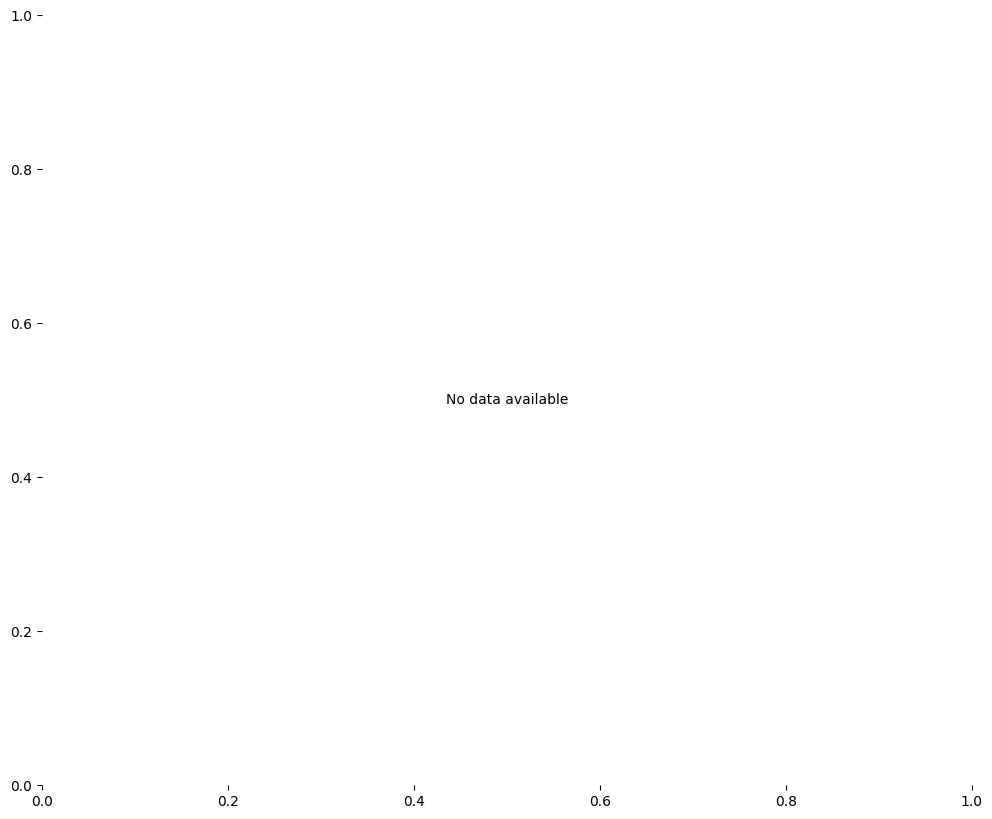

In [7]:
from matplotlib.animation import FuncAnimation

# Ensure the data is sorted chronologically
filtered_data = data[data['Conference'] != 'Exhibition'].copy()
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data_sorted = filtered_data.sort_values('Date')

# Define the function to update the heatmap for animation
def update_heatmap(frame_number, data, all_scores, fig, ax):
    ax.clear()  # Clear the previous heatmap
    if frame_number == 0:  # Check if there is no data to plot
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        return

    # Filter the data up to the current frame
    temp_data = data.iloc[:frame_number]
    score_combinations_temp = pd.pivot_table(temp_data, index='Home_Score', columns='Away_Score', values='Date', aggfunc='count', fill_value=0)
    score_combinations_temp = score_combinations_temp.reindex(index=all_scores, columns=all_scores, fill_value=0)
    sns.heatmap(score_combinations_temp, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5, ax=ax, cbar=False)
    ax.set_title('College Hockey Game Scoreboard Bingo\nUp to Date: ' + str(temp_data.iloc[-1]['Date'].date()), fontsize=16)
    ax.set_xlabel('Away Team Score', fontsize=14)
    ax.set_ylabel('Home Team Score', fontsize=14)
    ax.set_xticklabels(all_scores)
    ax.set_yticklabels(all_scores)

# Set up the figure and axis for the animation
fig, ax = plt.subplots(figsize=(12, 10))

# Creating the animation
anim = FuncAnimation(fig, update_heatmap, frames=len(filtered_data_sorted), fargs=(filtered_data_sorted, all_scores, fig, ax), interval=20, repeat=False)

# Save the animation
anim_file = '../TEMP/college_hockey_scoreboard_animation.mp4'
anim.save(anim_file, writer='ffmpeg', fps=10)

anim_file


In [8]:
# Save the animation
anim_file = '../TEMP/college_hockey_scoreboard_animation.mpg'
anim.save(anim_file, writer='ffmpeg', fps=10)

anim_file

MovieWriter ffmpeg unavailable; using Pillow instead.
